# nyquist sampling theorem 

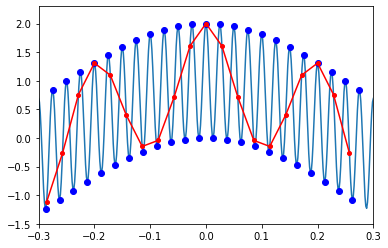

In [ ]:
from numpy import linspace,cos,pi,ceil,floor,arange
from pylab import plot,show,axis

# sampling a signal badlimited to 40 Hz 
# with a sampling rate of 800 Hz
f = 40;  # Hz
tmin = -0.3;
tmax = 0.3;
t = linspace(tmin, tmax, 400);
x = cos(2*pi*t) + cos(2*pi*f*t); # signal sampling
plot(t, x)

# sampling the signal with a sampling rate of 80 Hz
# in this case, we are using the Nyquist rate.
T = 1/80.0;
nmin = ceil(tmin / T);
nmax = floor(tmax / T);
n = arange(nmin,nmax);
x1 = cos(2*pi*n*T) + cos(2*pi*f*n*T);
plot(n*T, x1, 'bo')

# sampling the signal with a sampling rate of 35 Hz
# note that 35 Hz is under the Nyquist rate.
T = 1/35.0;
nmin = ceil(tmin / T);
nmax = floor(tmax / T);
n = arange(nmin,nmax);
x2 = cos(2*pi*n*T) + cos(2*pi*f*n*T);
plot(n*T, x2, '-r.',markersize=8)

axis([-0.3, 0.3, -1.5, 2.3])
show()

# Digital Low Pass Butterworth Filter 

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

In [ ]:
# Specifications of Filter
  
 # sampling frequency
f_sample = 40000 
  
# pass band frequency
f_pass = 4000  
  
# stop band frequency
f_stop = 8000  
  
# pass band ripple
fs = 0.5
  
# pass band freq in radian
wp = f_pass/(f_sample/2)  
  
# stop band freq in radian
ws = f_stop/(f_sample/2) 
  
# Sampling Time
Td = 1  
  
 # pass band ripple
g_pass = 0.5 
  
# stop band attenuation
g_stop = 40  

**Building the filter using signal.buttord function**

In [ ]:
# Conversion to prewrapped analog frequency
omega_p = (2/Td)*np.tan(wp/2)
omega_s = (2/Td)*np.tan(ws/2)


# Design of Filter using signal.buttord function
N, Wn = signal.buttord(omega_p, omega_s, g_pass, g_stop, analog=True)


# Printing the values of order & cut-off frequency!
print("Order of the Filter=", N) # N is the order
# Wn is the cut-off freq of the filter
print("Cut-off frequency= {:.3f} rad/s ".format(Wn))


# Conversion in Z-domain

# b is the numerator of the filter & a is the denominator
b, a = signal.butter(N, Wn, 'low', True)
z, p = signal.bilinear(b, a, fs)
# w is the freq in z-domain & h is the magnitude in z-domain
w, h = signal.freqz(z, p, 512)


Order of the Filter= 9
Cut-off frequency= 0.226 rad/s 


**Plotting the Magnitude Response.**

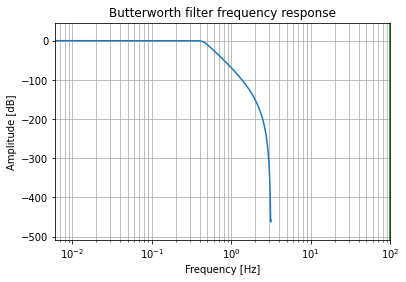

In [ ]:
# Magnitude Response
plt.semilogx(w, 20*np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green')
plt.show()


**Plotting the Impulse Response.**

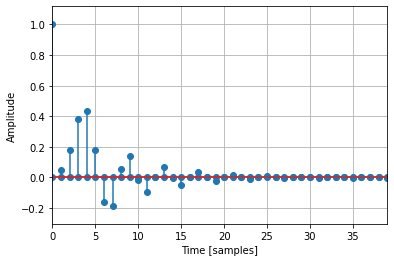

In [ ]:
# Impulse Response
imp = signal.unit_impulse(40)
c, d = signal.butter(N, 0.5)
response = signal.lfilter(c, d, imp)

plt.stem(np.arange(0, 40), imp, use_line_collection=True)
plt.stem(np.arange(0, 40), response, use_line_collection=True)
plt.margins(0, 0.1)

plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


**Plotting the Phase Response.**

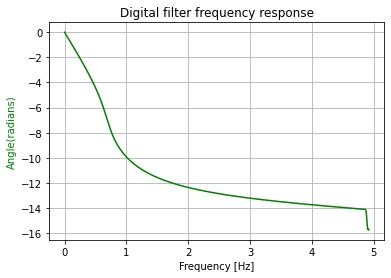

In [ ]:
# Phase Response
fig, ax1 = plt.subplots()

ax1.set_title('Digital filter frequency response')
ax1.set_ylabel('Angle(radians)', color='g')
ax1.set_xlabel('Frequency [Hz]')

angles = np.unwrap(np.angle(h))

ax1.plot(w/2*np.pi, angles, 'g')
ax1.grid()
ax1.axis('tight')
plt.show()


# Noise Removal using Lowpass Digital Butterworth Filter in Scipy

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

In [ ]:
# Specifications of the filter
f1 = 25 # Frequency of 1st signal
f2 = 50 # Frequency of 2nd signal
N = 10 # Order of the filter


# Generate the time vector of 1 sec duration
t = np.linspace(0, 1, 1000) # Generate 1000 samples in 1 sec

# Generate the signal containing f1 and f2
sig = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)


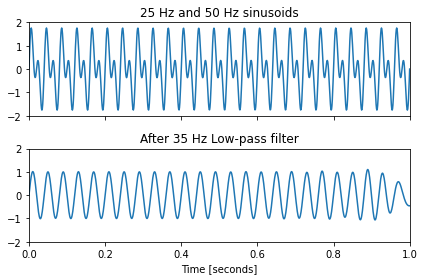

In [ ]:
# Display the signal
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('25 Hz and 50 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

# Design the Butterworth filter using signal.butter and output='sos'

sos = signal.butter(50, 35, 'lp', fs=1000, output='sos')

# Filter the signal by the filter using signal.sosfilt

# Use signal.sosfiltfilt to get output inphase with input
filtered = signal.sosfiltfilt(sos, sig)


# Display the output signal
ax2.plot(t, filtered)
ax2.set_title('After 35 Hz Low-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()


In [ ]:
pip install playsound

  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=004cb53d5d6f76af2b285f87ffa98f3129dac4dee0189288030cee1396eee271
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [ ]:
pip install librosa